<a href="https://colab.research.google.com/github/saadmarwan16/linear_regression_exercises/blob/main/test_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files
# files.upload()

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('mlr03.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   EXAM1   25 non-null     int64
 1   EXAM2   25 non-null     int64
 2   EXAM3   25 non-null     int64
 3   FINAL   25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [5]:
df.corr()

,EXAM1,EXAM2,EXAM3,FINAL
EXAM1,1.000000,0.901363,0.892743,0.946071
EXAM2,0.901363,1.000000,0.846359,0.929471
EXAM3,0.892743,0.846359,1.000000,0.972328
FINAL,0.946071,0.929471,0.972328,1.000000


In [6]:
X = df[['EXAM1', 'EXAM2', 'EXAM3']]
X1 = df['EXAM1']
X2 = df['EXAM2']
X3 = df['EXAM3']
Y = df['FINAL']

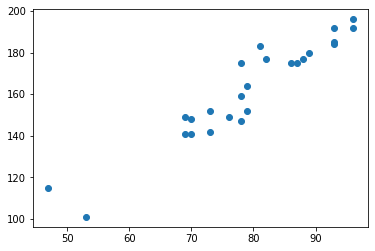

In [7]:
plt.scatter(X1, Y);

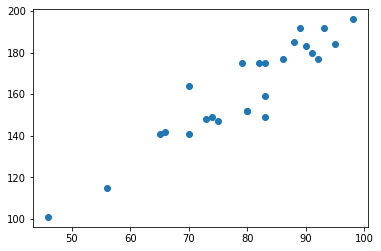

In [8]:
plt.scatter(X2, Y);

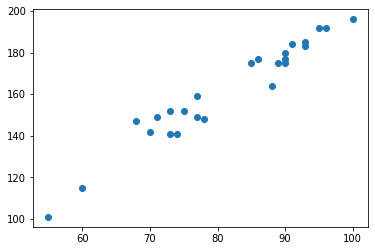

In [9]:
plt.scatter(X3, Y);

In [10]:
def fit(X, Y):
    denominator = X.dot(X) - X.mean() * X.sum()
    a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
    b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
    
    return a*X + b

In [11]:
def get_r2(X, Y):
    Y_hat = fit(X, Y)
    d1 = Y - Y_hat
    d2 = Y - Y.mean()
    
    return 1 - d1.dot(d1) / d2.dot(d2)

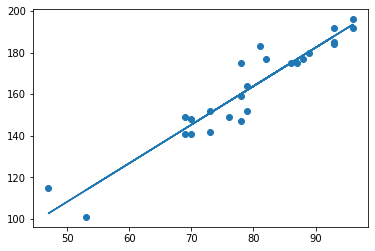

In [12]:
Y1_hat = fit(X1, Y)
plt.scatter(X1, Y)
plt.plot(X1, Y1_hat);

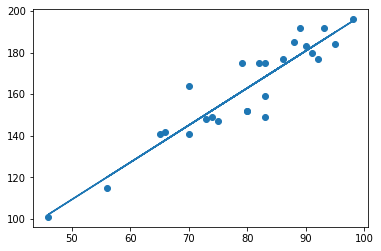

In [13]:
Y2_hat = fit(X2, Y)
plt.scatter(X2, Y)
plt.plot(X2, Y2_hat);

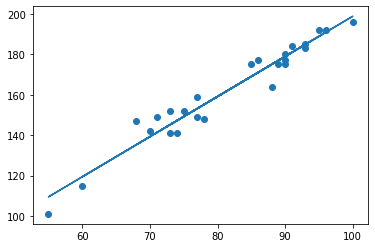

In [14]:
Y3_hat = fit(X3, Y)
plt.scatter(X3, Y)
plt.plot(X3, Y3_hat);

In [15]:
print(f"The value of r_squared for X1 is: {get_r2(X1, Y)}")
print(f"The value of r_squared for X2 is: {get_r2(X2, Y)}")
print(f"The value of r_squared for X3 is: {get_r2(X3, Y)}")

The value of r_squared for X1 is: 0.8950500188020498
The value of r_squared for X2 is: 0.8639171580561357
The value of r_squared for X3 is: 0.9454207808340621


In [16]:
def fit_multiple(df, X_raw, Y):
    X = list()
    ones = np.array([1]*X_raw.shape[0])

    X.append(ones)
    X.append(df['EXAM1'].values)
    X.append(df['EXAM2'].values)
    X.append(df['EXAM3'].values)

    X = np.vstack(X).T

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

    return (np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train)), X_test, y_test)

In [17]:
def get_multiple_r2(df, X, Y):
    w, X_test, y_test = fit_multiple(df, X, Y)

    Y_hat = X_test.dot(w)

    d1 = y_test - Y_hat
    d2 = y_test - Y.mean()

    return 1 - d1.dot(d1) / d2.dot(d2)

In [18]:
print(f"The r_squared value for X1, X2 and X3 is: {get_multiple_r2(df, X, Y)}")

The r_squared value for X1, X2 and X3 is: 0.9794395814278744
